In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

### Problem Statement:

Determine if there is a significant difference in the average test scores between students who attended a special preparatory course and those who did not.

Hypothesis:

Null Hypothesis: There is no difference in the average test scores between the two groups.

Alternative Hypothesis: There is a significant difference in the average test scores between the two groups.

In [3]:
data = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Datasets\\test_scores.csv")

In [27]:
data.head()

,Test_Score,Prep_Course
0,79.967142,1.0
1,73.617357,1.0
2,81.476885,1.0
3,90.230299,1.0
4,72.658466,1.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Test_Score   100 non-null    float64
 1   Prep_Course  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [29]:
df_nocourse = data[data['Prep_Course'] == 0]
df_course = data[data['Prep_Course'] == 1]

In [57]:
df_nocourse = df_nocourse.reset_index(drop=True).drop(columns=['Prep_Course'])
df_course = df_course.reset_index(drop=True).drop(columns=['Prep_Course'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6888\2797567760.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_nocourse)


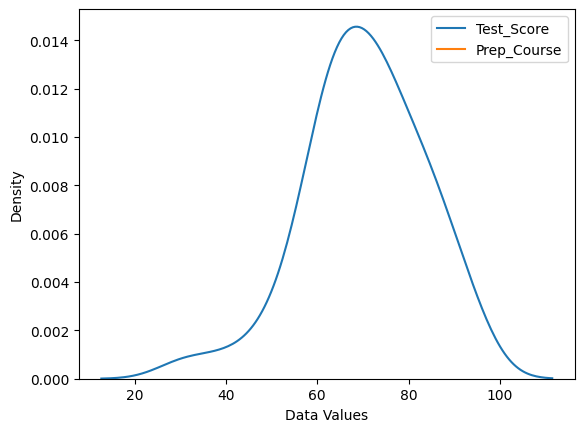

In [33]:
sns.kdeplot(df_nocourse)

plt.xlabel('Data Values')
plt.ylabel('Density')

plt.show()

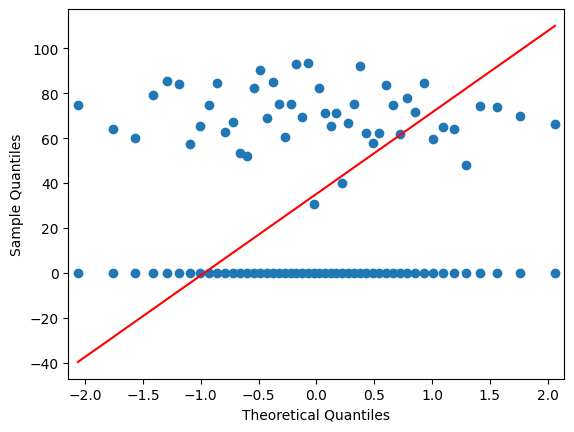

In [36]:
sm.qqplot(df_nocourse, line='s')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6888\1686477521.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_course)


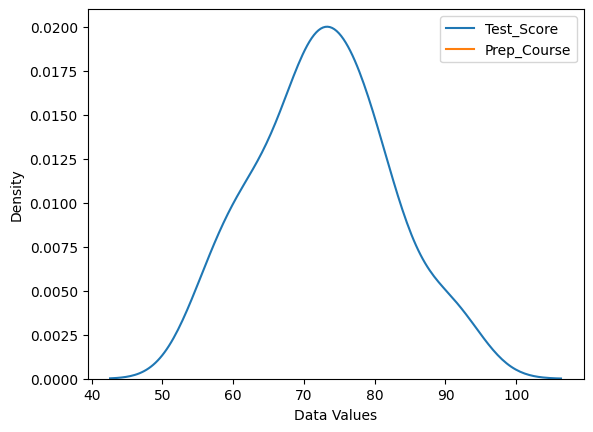

In [35]:
sns.kdeplot(df_course)

plt.xlabel('Data Values')
plt.ylabel('Density')

plt.show()

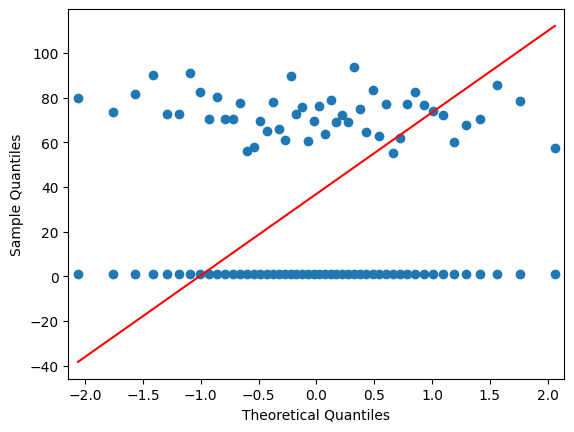

In [37]:
sm.qqplot(df_course, line='s')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [38]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [42]:
stat, p_val = stats.normaltest(df_nocourse['Test_Score'])

In [43]:
print('\nNormaltest p-value is: {:1.2f} \n'.format(p_val))

check_p_val(p_val, alpha=0.05)


Normaltest p-value is: 0.14 

We do not have evidence to reject the null hypothesis.


In [44]:
stat, p_val = stats.normaltest(df_course['Test_Score'])

In [45]:
print('\nNormaltest p-value is: {:1.2f} \n'.format(p_val))

check_p_val(p_val, alpha=0.05)


Normaltest p-value is: 0.81 

We do not have evidence to reject the null hypothesis.


In [58]:
print(df_nocourse.mean())
print(df_course.mean())

Test_Score    70.266713
dtype: float64
Test_Score    72.745261
dtype: float64


In [68]:
len(df_nocourse)

50

In [69]:
len(df_course)

50

In [80]:
stat, p = stats.levene(df_nocourse['Test_Score'], df_course['Test_Score'])

if p < 0.05:
    print("Variances are significantly different. Use equal_var=False.")
else:
    print("No significant difference in variances. Use equal_var=True.")

Variances are significantly different. Use equal_var=False.


In [81]:
stats.ttest_ind(a=df_nocourse['Test_Score'], b=df_course['Test_Score'], equal_var=False)

TtestResult(statistic=-1.0886464698373464, pvalue=0.2792649302472195, df=88.5178049116224)

In [82]:
stats.t.ppf(q=0.025, df=88.5178049116224)

-1.9871278522131863

In [6]:
stats.t.ppf(q=0.975, df=88.5178049116224)

1.9871278522131859

In [8]:
stats.t.cdf(x=-1.0886464698373464, df=88.5178049116224) * 2

0.2792649302472195